# **M Fawwaz Firjatullah MODUL 2 Capstone Project**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

## Detail Data

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

Berikut adalah isi dari dataset SaaS-Sales

In [3]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Tahap Data Understanding and Cleaning

Sebelum melakukan analisis, kita perlu mengenal dataset terlebih dahulu dengan melakukan data understanding dan cleaning. Proses ini akan membantu kita untuk mengetahui anomali apa saja yang terdapat di dataset kita dan yang perlu ditangani dalam tahapan data cleaning. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

**Jumlah Baris dan Kolom dataset :**

In [4]:
df.shape

(9994, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [6]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [7]:
pd.set_option('display.max_colwidth', None)
# Data unik pada kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

- Row ID berisi index baris dan tidak diperlukan dalam proses analisa sehingga bisa dihapus.

- Kolom Date Key berisi tanggal yang berisi sama persis dengan kolom Order Date sehingga terjadi redundansi sehingga bisa dihapus saja.

- Customer ID berisi id unik untuk tiap customer, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

- Kolom License berisi license produk dan tidak diperlukan proses analisa sehingga bisa dihapus.

In [8]:
df = df[['Order ID', 'Order Date', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Industry', 'Segment', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit']]

In [9]:
df.isna().sum()

Order ID      0
Order Date    0
Country       0
City          0
Region        0
Subregion     0
Customer      0
Industry      0
Segment       0
Product       0
Sales         0
Quantity      0
Discount      0
Profit        0
dtype: int64

**Data tidak terdapat missing value**

In [10]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 14)


,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[AMER-2021-126235, EMEA-2023-109484]"
1,Order Date,object,0,1237,"[2/6/2021, 8/28/2021]"
2,Country,object,0,48,"[Iceland, South Korea]"
3,City,object,0,262,"[Rio de Janeiro, Chennai]"
4,Region,object,0,3,"[AMER, EMEA]"
5,Subregion,object,0,12,"[UKIR, EU-EAST]"
6,Customer,object,0,99,"[Airbus, Prudential Financial]"
7,Industry,object,0,10,"[Finance, Retail]"
8,Segment,object,0,3,"[Enterprise, Strategic]"
9,Product,object,0,14,"[Alchemy, Big Ol Database]"


## **Data Analysis**

Perusahaan ingin mencari tahu bagaimana cara meningkatkan Sales dan juga Profit pada perusahaan. Kita pertama akan melihat tingkat profit yang masih rendah dan faktor apa saja yang mempengaruhi profit perusahaan, berdasarkan informasi yang didapat maka dapat menjadi informasi yang penting bagi perusahaan.

Sebagai seorang data analyst, kita dapat mencoba menjawab pertanyaan berikut:

**Bagaimana cara meningkatkan tingkat profit pada produk berdasarkan Sales, Segment customer, dan Industri perusahaan?**

Analisis akan dilakukan dengan membuat kolom profit margin lalu melihat profit terkecil pada setiap product dan juga industri

## **Analisis Diskon**

In [11]:
df['Sales'].sum()

2297200.8603000003

In [12]:
df['Profit'].sum()

286397.0217

In [13]:
df['Quantity'].sum()

37873

In [36]:
df['Margin'] = df['Profit'] / df['Sales']
df['Margin'].mean()

C:\Users\DeadKitt3n\AppData\Local\Temp\ipykernel_9680\1571034625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Margin'] = df['Profit'] / df['Sales']


0.12031392972104459

In [15]:
df.groupby('Product')['Profit'].sum().sort_values()

Product
Marketing Suite               -3472.5560
Storage                         949.5182
Big Ol Database                3384.7569
ChatBot Plugin                 6527.7870
SaaS Connector Pack - Gold     6964.1767
ContactMatcher                12496.2822
SaaS Connector Pack           13059.1436
OneView                       18138.0054
Marketing Suite - Gold        21278.8264
FinanceHub                    32136.4203
Support                       32864.4698
Data Smasher                  41936.6357
Site Analytics                44515.7306
Alchemy                       55617.8249
Name: Profit, dtype: float64

In [16]:
df.groupby('Industry')['Profit'].sum().sort_values()

Industry
Misc                  7163.6290
Transportation        7402.6967
Communications       13976.3410
Tech                 24615.0436
Retail               30207.8208
Healthcare           31969.0932
Consumer Products    37018.0077
Manufacturing        38413.1064
Energy               45282.3137
Finance              50348.9696
Name: Profit, dtype: float64

Kemudian kita akan melihat pengaruh discount terhadap profit margin

<Axes: xlabel='Discount'>

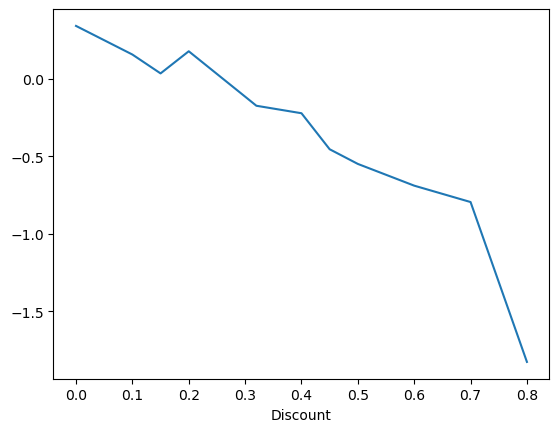

In [57]:
df.groupby('Discount')['Margin'].mean().plot(kind='line')

Berdasarkan grafik diatas, kita dapat melihat pengaruh besar yang dimiliki oleh discount kepada profit margin. Semakin besar jumlah discount maka profit margin akan semakin berkurang. Terjadinya profit minus ada ketika discount lebih besar dari 20%. Kemudian kita perlu melihat apakah discount memengaruhi jumlah kuantitas pembelian product dan juga sales.

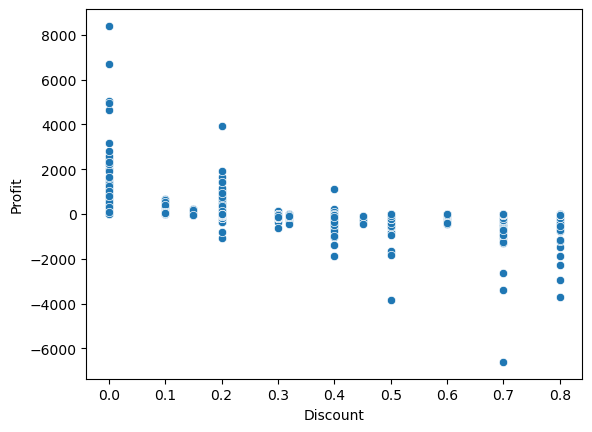

In [62]:
sns.scatterplot(data= df,x='Discount', y='Profit')
plt.show()

<Axes: xlabel='Discount'>

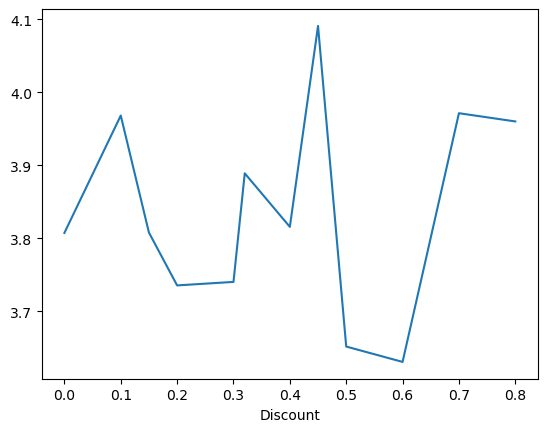

In [18]:
df.groupby('Discount')['Quantity'].mean().plot(kind='line')

Berdasarkan grafik dapat dilihat bahwa memang adanya pengaruh diskon pada jumlah produk yang dibeli oleh customer

<Axes: xlabel='Discount'>

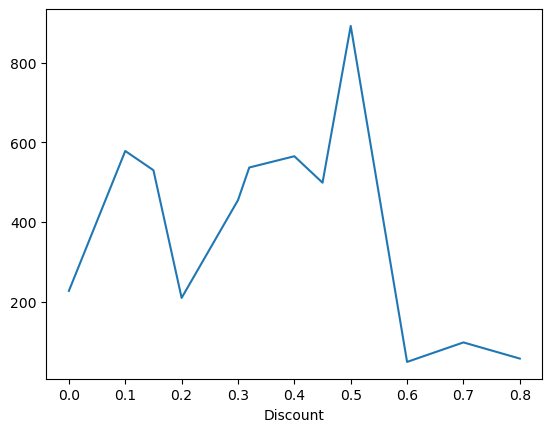

In [19]:
df.groupby('Discount')['Sales'].mean().plot(kind='line')

Namun meski jumlah kuantitas produk yang dibeli lebih banyak ketika ada diskon besar tetapi sales yang didapatkan menjadi semakin buruk seperti grafik diatas.

<Axes: xlabel='Quantity'>

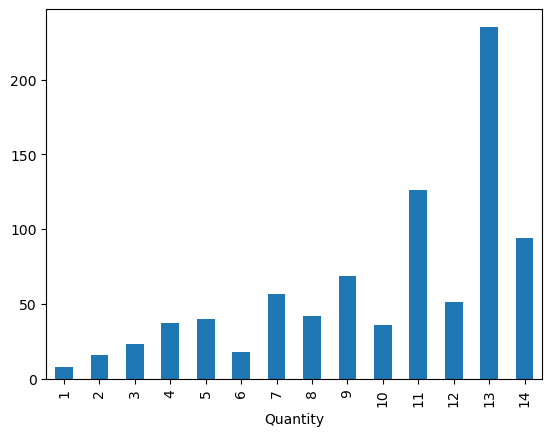

In [20]:
df.groupby('Quantity')['Profit'].mean().plot(kind='bar')

Berdasarkan grafik diatas dapat dilihat apabila kuantitas produk yang dibeli semakin banyak maka sebenarnya profit yang didapatkan juga akan semakin besar, oleh karena itu dapat disimpulkan bahwa pembelian jumlah banyak pada diskon yang besar adalah faktor besar rendahnya profit pada beberapa transaksi.

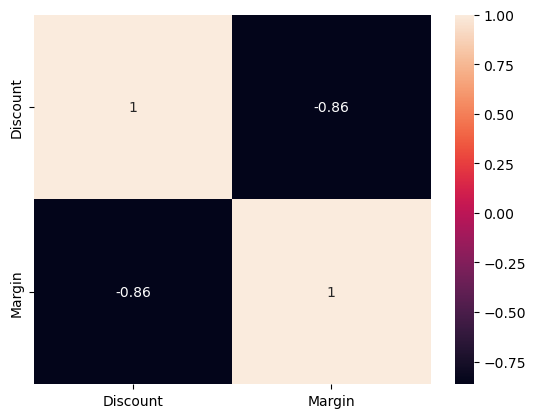

In [53]:
df1 = df[['Discount','Margin']]
sns.heatmap(data = df1.corr(numeric_only=True),
            annot= True,)
plt.show()

Berdasarkan heatmap diatas dapat dilihat bahwa diskon sangat berkorelasi negatif terhadap profit margin.

## **Analisis Region**

Pada tahap analisis ini kita akan melihat region mana yang memiliki profit terendah.

In [22]:
df_CTprofit = df.groupby(by= ['Region','Country','City'])[['Profit']].sum().reset_index().sort_values(by='Profit', ascending=True).head(10)
df_CTprofit

,Region,Country,City,Profit
172,EMEA,France,Paris,-13837.7674
141,APJ,Japan,Tokyo,-10359.5390
33,AMER,Mexico,Tijuana,-8457.0260
137,APJ,Japan,Osaka,-7333.9761
234,EMEA,Sweden,Gothenburg,-7188.0593
111,APJ,Australia,Sydney,-6654.5688
215,EMEA,Russia,Moscow,-4029.6944
109,APJ,Australia,Melbourne,-3919.7352
30,AMER,Mexico,Mexico City,-3860.0077
225,EMEA,South Africa,Johannesburg,-3798.9742


Berdasarkan tabel diatas dapat dilihat bahwa Paris dari negara Perancis dan region EMEA memiliki profit terendah dari tempat lain namun untuk region kita akan telusuri lebih lanjut. 

C:\Users\DeadKitt3n\AppData\Local\Temp\ipykernel_9680\4147630383.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df,


<Axes: xlabel='Region', ylabel='Profit'>

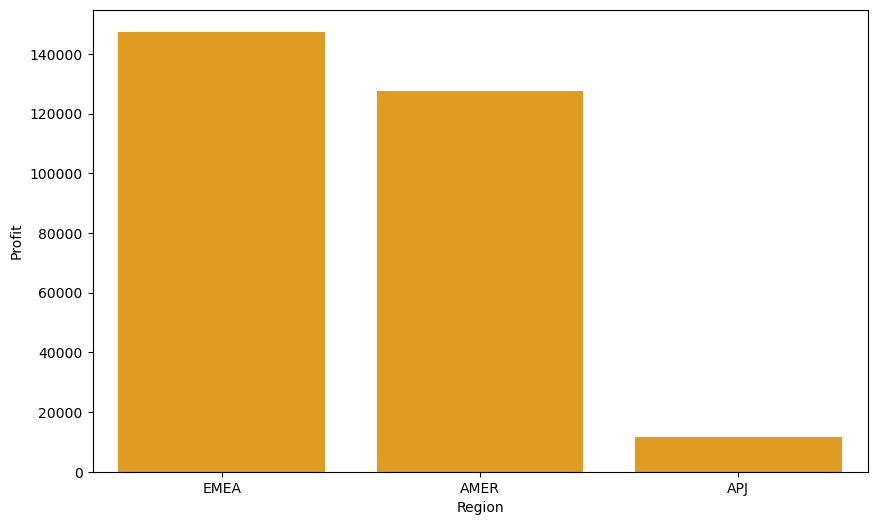

In [49]:
fig, ax = plt.subplots(figsize =(10,6))

sns.barplot(data=df,
            x = 'Region',
            y = 'Profit',
            color = 'orange',
            estimator=np.sum,
            ci = 0)

Grafik diatas menunjukkan kalau region APJ atau Asia Pacific Japan memiliki total profit terburuk dibanding region lainnya, kita akan menganalisa region ini lebih lanjut.

In [24]:
df.groupby(['Product','Region'])[['Profit']].sum()

Profit
Product                    Region            
Alchemy                    AMER    18264.2564
                           APJ     17819.8729
                           EMEA    19533.6956
Big Ol Database            AMER    -4369.3768
                           APJ     -2077.9085
                           EMEA     9832.0422
ChatBot Plugin             AMER     2698.8127
                           APJ      1122.5064
                           EMEA     2706.4679
ContactMatcher             AMER    26663.9591
                           APJ    -21583.6618
                           EMEA     7415.9849
Data Smasher               AMER    19152.0253
                           APJ      4244.7980
                           EMEA    18539.8124
FinanceHub                 AMER     9255.0745
                           APJ      1652.3162
                           EMEA    21229.0296
Marketing Suite            AMER       52.7756
                           APJ     -1895.6634
                           EMEA    -1629.6682
Marketing Suite - Gold     AMER    10364.8535
                           APJ      2718.0106
                           EMEA     8195.9623
OneView                    AMER    10613.2993
                           APJ     -5270.8407
                           EMEA    12795.5468
SaaS Connector Pack        AMER     8690.4832
                           APJ     -3774.0631
                           EMEA     8142.7235
SaaS Connector Pack - Gold AMER     2408.6077
                           APJ      1885.8752
                           EMEA     2669.6938
Site Analytics             AMER     9272.6395
                           APJ     10631.0486
                           EMEA    24612.0425
Storage                    AMER      407.2475
                           APJ       170.5581
                           EMEA      371.7126
Support                    AMER    13952.3323
                           APJ      5871.1384
                           EMEA    13040.9991

Terlihat product yang memiiki profit negatif rata rata terjual di region APJ

In [25]:
dfsortprofit = df.sort_values(by= 'Profit', ascending=False)

C:\Users\DeadKitt3n\AppData\Local\Temp\ipykernel_9680\4049968861.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfsortprofit,


<Axes: xlabel='Subregion', ylabel='Profit'>

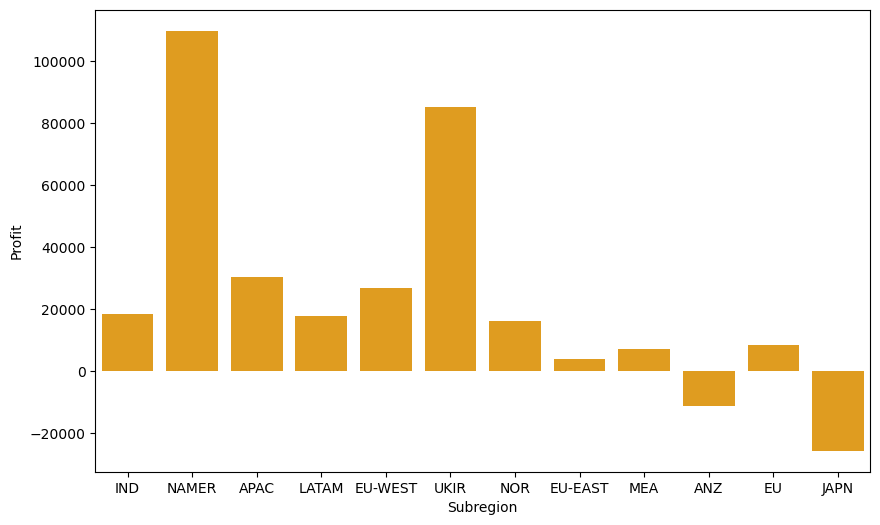

In [48]:
fig, ax = plt.subplots(figsize =(10,6))

sns.barplot(data=dfsortprofit,
            x = 'Subregion',
            y = 'Profit',
            color = 'Orange',
            estimator=np.sum,
            ci = 0)

Dapat dilihat dari grafik diatas apabila subregion dengan profit terburuk adalah subregion JAPN

C:\Users\DeadKitt3n\AppData\Local\Temp\ipykernel_9680\507682677.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfsortprofit,


<Axes: xlabel='Subregion', ylabel='Discount'>

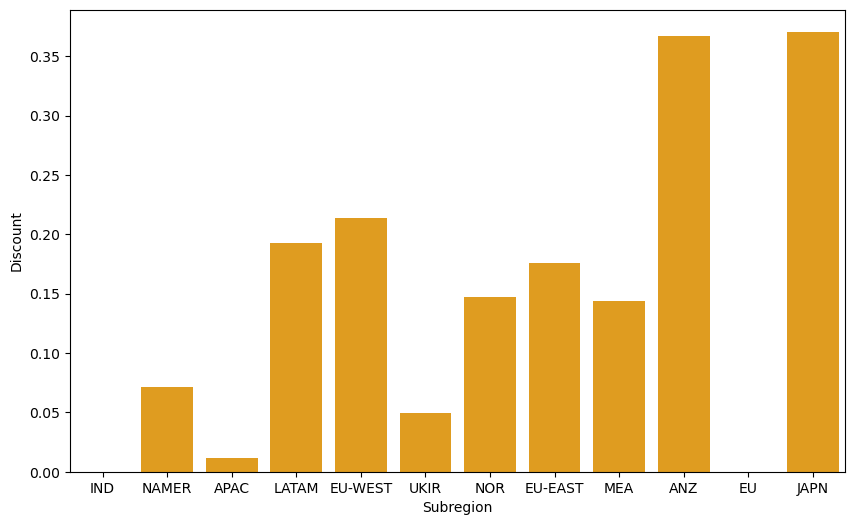

In [47]:
fig, ax = plt.subplots(figsize =(10,6))

sns.barplot(data=dfsortprofit,
            x = 'Subregion',
            y = 'Discount',
            color= 'orange',
            estimator=np.mean,
            ci = 0)

Berdasarkan grafik diatas dua subregion dengan profit terendah memiliki rata rata diskon tertinggi dibanding subregion lainnya.

## **Analisis Produk dan Customer**

Pada tahap analisis ini kita akan melihat produk dan customer beserta industri asal mereka agar dapat mengetahui produk atau customer mana yang memiliki profit terendah.

In [28]:
df_Cust = df.groupby(by=['Industry','Customer','Product']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Order ID': 'nunique'
}).reset_index()

df_Cust.rename(columns={'Sales':'Total Sales','Profit':'Total Profit','Order ID':'Total Order'}, inplace=True)
df_Cust

,Industry,Customer,Product,Total Sales,Total Profit,Discount,Total Order
0,Communications,AT&T,Big Ol Database,5914.454,2043.0442,0.400000,4
1,Communications,AT&T,ChatBot Plugin,509.832,121.5261,0.023529,14
2,Communications,AT&T,ContactMatcher,4830.484,73.8985,0.358333,19
3,Communications,AT&T,Data Smasher,2256.376,649.0615,0.066667,13
4,Communications,AT&T,FinanceHub,4307.920,550.3523,0.109091,10
...,...,...,...,...,...,...,...
1255,Transportation,United Parcel Service,SaaS Connector Pack,994.666,254.8483,0.085714,12
1256,Transportation,United Parcel Service,SaaS Connector Pack - Gold,238.120,111.9164,0.000000,4
1257,Transportation,United Parcel Service,Site Analytics,3583.976,466.6846,0.181818,10
1258,Transportation,United Parcel Service,Storage,27.532,10.2190,0.066667,3


Pertama kita akan membuat dataframe baru dapat menampilkan total sales dan profit lalu juga rata rata diskon yang diberikan serta profit margin.

In [29]:
df_Cust['Avg Order Value'] = df_Cust['Total Sales'] / df_Cust['Total Order']
df_Cust['Profit Margin']   = df_Cust['Total Profit'] / df_Cust['Total Sales']
df_Cust.sort_values(by='Total Profit', ascending=True).head(20)

,Industry,Customer,Product,Total Sales,Total Profit,Discount,Total Order,Avg Order Value,Profit Margin
374,Finance,Allstate,Big Ol Database,4895.9850,-6409.8980,0.350000,2,2447.992500,-1.309215
1084,Tech,Bosch,ContactMatcher,8546.4780,-3907.4626,0.362500,19,449.814632,-0.457202
935,Retail,Costco Wholesale,Big Ol Database,7999.9800,-3839.9904,0.500000,1,7999.980000,-0.480000
1220,Transportation,FedEx,Big Ol Database,2549.9850,-3399.9800,0.700000,1,2549.985000,-1.333333
1020,Retail,Walgreens,Big Ol Database,1799.9940,-2639.9912,0.700000,1,1799.994000,-1.466667
526,Finance,Itochu,ContactMatcher,4982.4420,-2600.7444,0.412000,20,249.122100,-0.521982
1108,Tech,HonHai Precision Industry,Big Ol Database,6632.4750,-2257.3083,0.550000,3,2210.825000,-0.340342
551,Finance,Morgan Stanley,ContactMatcher,13242.0220,-2242.4848,0.368750,25,529.680880,-0.169346
513,Finance,HSBC Holdings,ContactMatcher,9499.9200,-2049.9595,0.457895,15,633.328000,-0.215787
706,Healthcare,Merck,ContactMatcher,3466.0940,-1939.1885,0.428571,12,288.841167,-0.559474


Setelah diurutkan berdasarkan total profit terendah maka kita dapat melihat customer, dari industry mana customer tersebut berasal, dan juga product yang dibeli.

In [54]:
df[df['Profit'] < 0][['Customer','Industry','Segment','Product','Region','Country','Profit']].sort_values(by='Profit').head(10)

,Customer,Industry,Segment,Product,Region,Country,Profit
7772,Allstate,Finance,SMB,Big Ol Database,AMER,Mexico,-6599.9780
683,Costco Wholesale,Retail,Strategic,Big Ol Database,EMEA,Sweden,-3839.9904
9774,Bosch,Tech,SMB,ContactMatcher,APJ,Japan,-3701.8928
3011,FedEx,Transportation,Enterprise,Big Ol Database,EMEA,Russia,-3399.9800
4991,Ford Motor,Manufacturing,Strategic,ContactMatcher,APJ,Australia,-2929.4845
3151,Walgreens,Retail,SMB,Big Ol Database,AMER,Mexico,-2639.9912
5310,Itochu,Finance,SMB,ContactMatcher,APJ,Japan,-2287.7820
9639,Morgan Stanley,Finance,SMB,ContactMatcher,EMEA,Sweden,-1862.3124
1199,Volkswagen,Manufacturing,SMB,ContactMatcher,APJ,Japan,-1850.9464
2697,Anthem,Healthcare,Enterprise,Big Ol Database,EMEA,Germany,-1811.0784


Kemudian kita tampilkan Region dan juga Country untuk menjadikan detail tambahan.

In [31]:
minusprofit = df[df['Profit'] < 0]

Kita akan melihat lebih detail product dengan profit terendah, rata rata diskon nya, dan juga quantity product tersebut terjual.

In [32]:
dfminus = minusprofit.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Quantity': 'sum'
})

dfminus = dfminus.sort_values('Profit')
dfminus

,Sales,Profit,Discount,Quantity
Product,,,,
ContactMatcher,141119.1590,-70922.6447,0.645282,3213
Big Ol Database,72456.2530,-30118.6682,0.581818,157
Marketing Suite,48072.7408,-12152.2060,0.348532,422
FinanceHub,91988.4560,-9880.8413,0.261277,876
OneView,3382.5340,-8629.6412,0.800000,235
Site Analytics,35797.8400,-7530.6235,0.342647,476
SaaS Connector Pack,12845.8440,-6490.9134,0.530539,597
Marketing Suite - Gold,37869.0720,-6426.3038,0.200000,569
Support,14067.1760,-3015.6219,0.200000,110


Dapat dilihat bahwa Product ContactMatcher memiliki angka profit terburuk dan juga rata rata diskon dan juga quantity terjual yang tinggi.

In [42]:
minusprofit = minusprofit.sort_values(by='Profit', ascending=False)

C:\Users\DeadKitt3n\AppData\Local\Temp\ipykernel_9680\981412798.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=minusprofit,


<Axes: xlabel='Profit', ylabel='Product'>

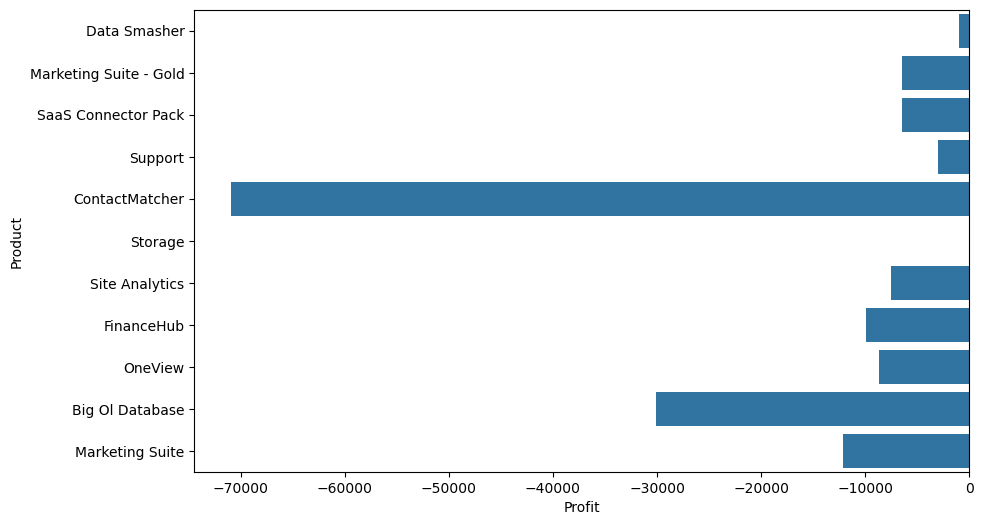

In [44]:
fig, ax = plt.subplots(figsize =(10,6))

sns.barplot(data=minusprofit,
            x = 'Profit',
            y = 'Product',
            estimator=np.sum,
            ci = 0)

C:\Users\DeadKitt3n\AppData\Local\Temp\ipykernel_9680\2178035946.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfsortprofit,


<Axes: xlabel='Industry', ylabel='Profit'>

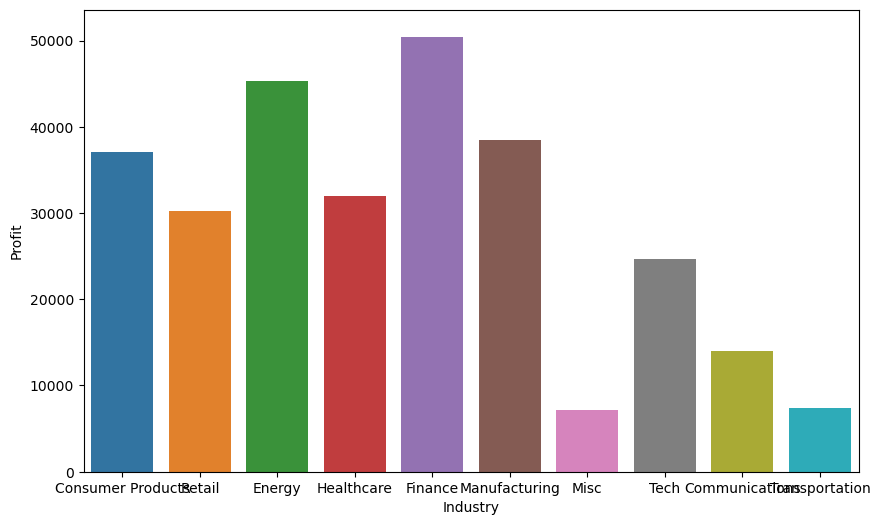

In [33]:
fig, ax = plt.subplots(figsize =(10,6))

sns.barplot(data=dfsortprofit,
            x = 'Industry',
            y = 'Profit',
            hue = 'Industry',
            estimator=np.sum,
            ci = 0)

Misc dan Transportation adalah industri dengan total profit terlemah

C:\Users\DeadKitt3n\AppData\Local\Temp\ipykernel_9680\3514412038.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dfsortprofit,


<Axes: xlabel='Segment', ylabel='Profit'>

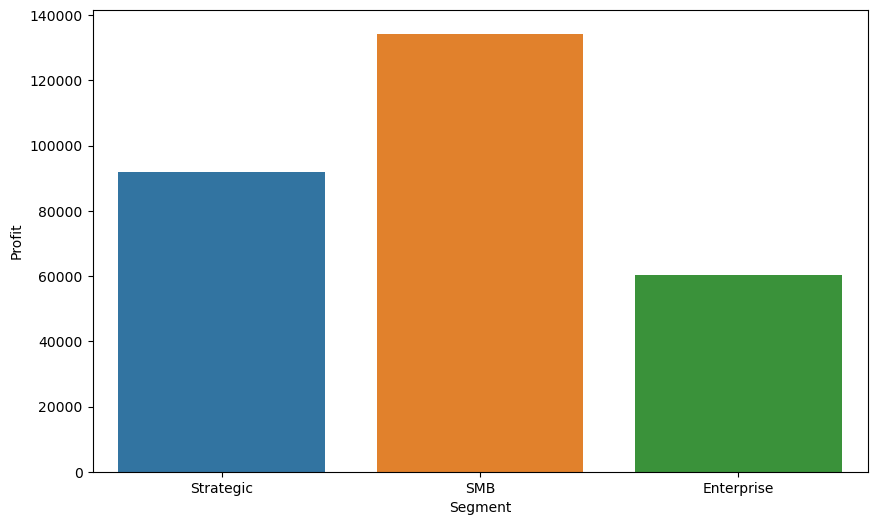

In [34]:
fig, ax = plt.subplots(figsize =(10,6))

sns.barplot(data=dfsortprofit,
            x = 'Segment',
            y = 'Profit',
            hue = 'Segment',
            estimator=np.sum,
            ci = 0)

Enterprise adalah segment customer dengan profit terendah, namun segment SMB memiliki customer terbanyak pada 10 customer dengan profit terburuk meski total profit yang besar.

## **Kesimpulan dan Rekomendasi**

- Faktor terbesar yang mempengaruhi profit dari penjualan adalah discount. Dapat dilihat pola yaitu ketika tingkat discount naik maka quantity product dan sales juga akan ikut naik, namun margin profit akan menurun. Kemungkinan besar terjadi discount berlebih contoh nya seperti pada penjualan segment SMB.

- Profit buruk pada beberapa produk juga mempengaruhi total profit contoh nya dapat dilihat pada produk Big Ol Database dan ContactMatcher yang memiliki total profit minus terbanyak yang dapat dikorelasikan kembali dengan rata rata discount yang tinggi.

- Region APJ memiliki banyak transaksi dengan profit minus yang dapat terjadi karena biaya regional yang tidak cocok dengan harga product ataupun discount.

- Beberapa industry segment SMB mendapatkan profit terendah dibanding dengan yang lain, seperti yang dapat dilihat apabila Finance, Manufacturing, dan Healthcare sering muncul pada customer dengan total profit minus terbanyak. Salah satu faktor yang memengaruhi adalah discount yang terlalu banyak.

- Masih banyak customer yang memiliki tingkat sales yang tinggi namun profit yang masih negatif.

Berikut adalah beberapa rekomendasi agar nilai profit yang masih negatif dapat di minimalisir dan menjawab pertanyaan "Bagaimana cara meningkatkan tingkat profit pada produk berdasarkan Sales, Segment customer, dan Industri perusahaan?"

- Ubah ketentuan discount, yaitu pertama buat batasan discount product pada segment SMB dengan discount maksimal kisaran 10-15% saja pada product yang memikiki margin profit buruk.

- Hanya berikan discount ketika customer membeli lebih dari 2 product agar dapat menjaga profit margin.

- Melakukan review pembelian product ketika margin profit tergolong rendah

- Product Big Ol Database dan ContactMatcher dapat menyesuaikan harga dengan cara memberikan harga yang rendah pada customer yang entry level dan harga tinggi pada client besar, bisa juga dengan melakukan regional pricing kemudian kurangi discount, atau juga mengurangi ketersediaan product untuk menaikkan minat.

- Lakukan audit pada dampak mata uang lokal, pajak, margin customer, dan juga biaya lokalisasi pada region yang total profit negatif yang besar seperti region APJ dan negara Sweden

- Segera melakukan negosiasi ulang pada 10 customer dengan total profit negatif terbesar, tawarkan product serupa dengan biaya lebih rendah, kenalkan minimum annual uplift pada setiap pembaruan lisensi.

- Paketkan product profit rendah dengan product profit tinggi dan terapkan limit pada penjualan product standalone pada customer segment SMB.